In [233]:
setwd('.')
house_prices <- read.csv(file = 'train.csv', row.names=1)

In [234]:
library(psych)
library(corrplot)
library(reshape2)
library(ggplot2)
library(tidyr)
library(Hmisc)
library(cluster)
library(coefplot)
library(car)
library(caret)

In [235]:
colnames(house_prices)

[1] "MSSubClass"    "MSZoning"      "LotFrontage"   "LotArea"      
 [5] "Street"        "Alley"         "LotShape"      "LandContour"  
 [9] "Utilities"     "LotConfig"     "LandSlope"     "Neighborhood" 
[13] "Condition1"    "Condition2"    "BldgType"      "HouseStyle"   
[17] "OverallQual"   "OverallCond"   "YearBuilt"     "YearRemodAdd" 
[21] "RoofStyle"     "RoofMatl"      "Exterior1st"   "Exterior2nd"  
[25] "MasVnrType"    "MasVnrArea"    "ExterQual"     "ExterCond"    
[29] "Foundation"    "BsmtQual"      "BsmtCond"      "BsmtExposure" 
[33] "BsmtFinType1"  "BsmtFinSF1"    "BsmtFinType2"  "BsmtFinSF2"   
[37] "BsmtUnfSF"     "TotalBsmtSF"   "Heating"       "HeatingQC"    
[41] "CentralAir"    "Electrical"    "X1stFlrSF"     "X2ndFlrSF"    
[45] "LowQualFinSF"  "GrLivArea"     "BsmtFullBath"  "BsmtHalfBath" 
[49] "FullBath"      "HalfBath"      "BedroomAbvGr"  "KitchenAbvGr" 
[53] "KitchenQual"   "TotRmsAbvGrd"  "Functional"    "Fireplaces"   
[57] "FireplaceQu"   "GarageType"    "GarageYrBlt"   "GarageFinish" 
[61] "GarageCars"    "GarageArea"    "GarageQual"    "GarageCond"   
[65] "PavedDrive"    "WoodDeckSF"    "OpenPorchSF"   "EnclosedPorch"
[69] "X3SsnPorch"    "ScreenPorch"   "PoolArea"      "PoolQC"       
[73] "Fence"         "MiscFeature"   "MiscVal"       "MoSold"       
[77] "YrSold"        "SaleType"      "SaleCondition" "SalePrice"

In [236]:
nums <- unlist(lapply(house_prices, is.numeric))
house_prices_nums = house_prices[,nums]

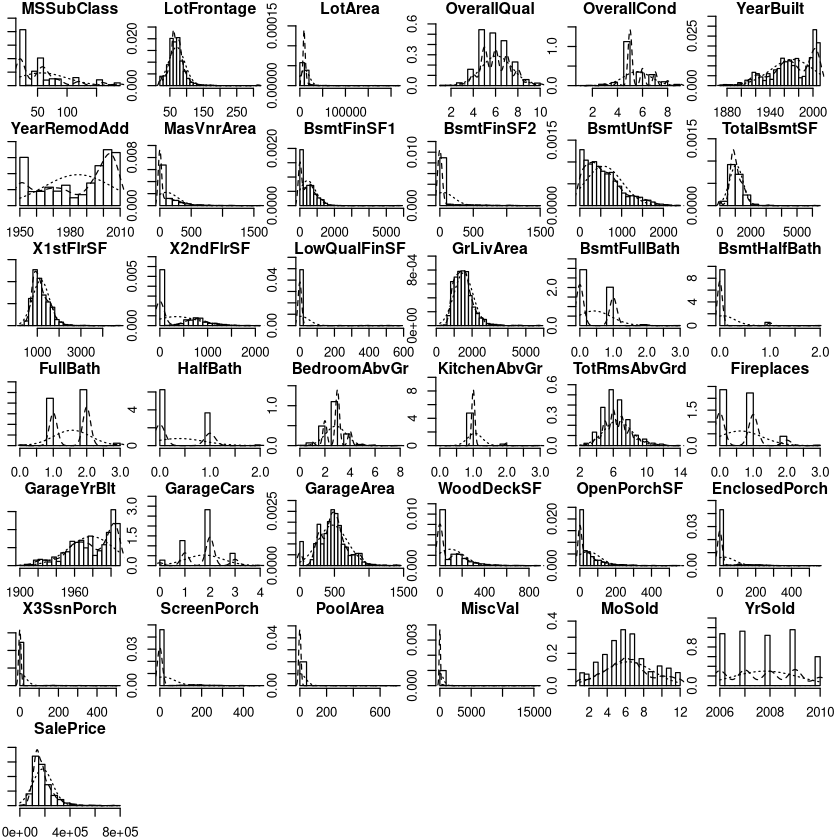

In [237]:
multi.hist(house_prices_nums)

In [238]:
summary(house_prices)

   MSSubClass       MSZoning     LotFrontage        LotArea        Street    
 Min.   : 20.0   C (all):  10   Min.   : 21.00   Min.   :  1300   Grvl:   6  
 1st Qu.: 20.0   FV     :  65   1st Qu.: 59.00   1st Qu.:  7554   Pave:1454  
 Median : 50.0   RH     :  16   Median : 69.00   Median :  9478              
 Mean   : 56.9   RL     :1151   Mean   : 70.05   Mean   : 10517              
 3rd Qu.: 70.0   RM     : 218   3rd Qu.: 80.00   3rd Qu.: 11602              
 Max.   :190.0                  Max.   :313.00   Max.   :215245              
                                NA's   :259                                  
  Alley      LotShape  LandContour  Utilities      LotConfig    LandSlope 
 Grvl:  50   IR1:484   Bnk:  63    AllPub:1459   Corner : 263   Gtl:1382  
 Pave:  41   IR2: 41   HLS:  50    NoSeWa:   1   CulDSac:  94   Mod:  65  
 NA's:1369   IR3: 10   Low:  36                  FR2    :  47   Sev:  13  
             Reg:925   Lvl:1311                  FR3    :   4             
 

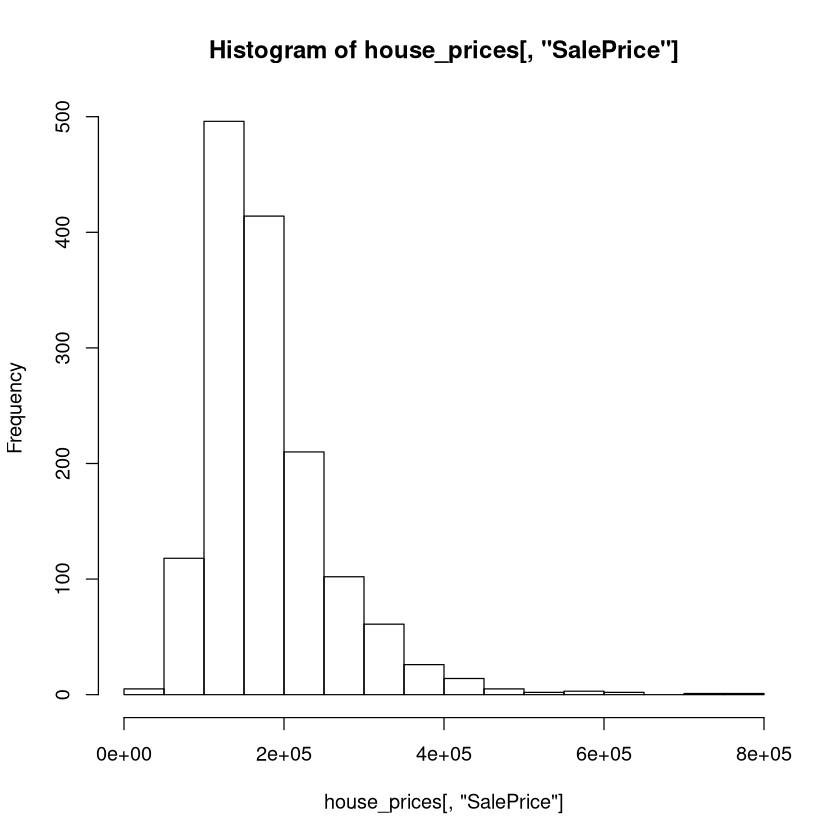

In [239]:
hist(house_prices[,'SalePrice'])

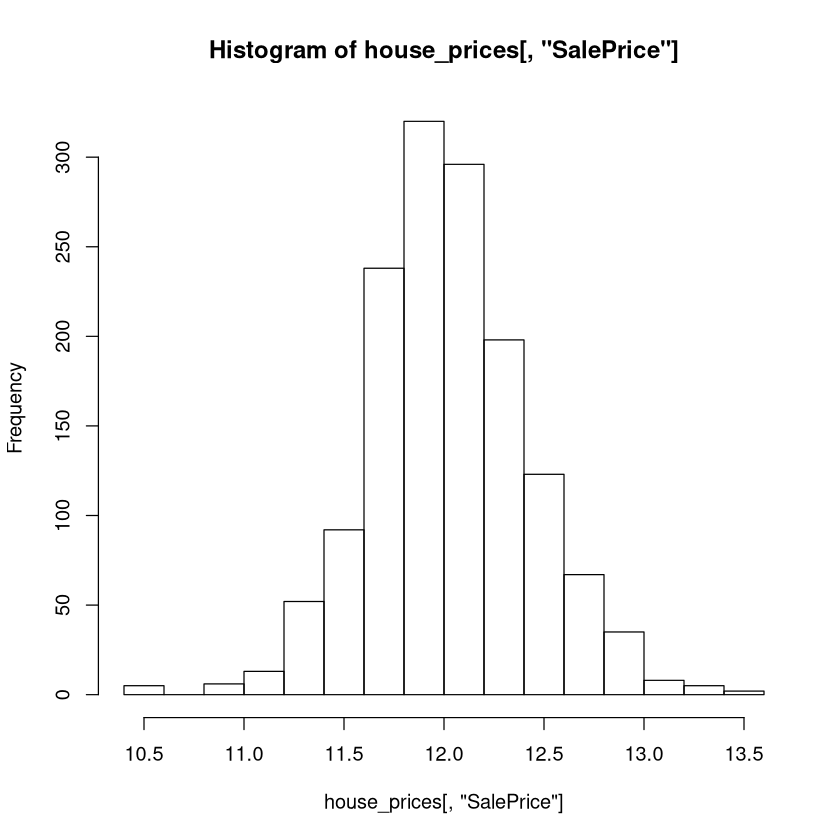

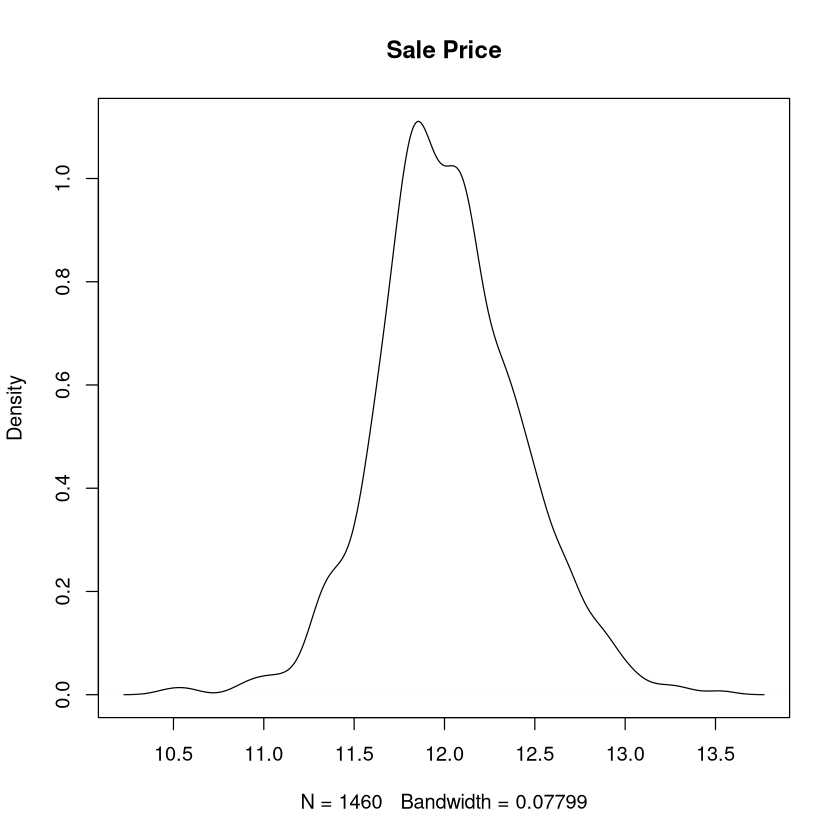

In [240]:
house_prices[,'SalePrice'] = log(house_prices[,'SalePrice'])
hist(house_prices[,'SalePrice'])
d <- density(house_prices$SalePrice)
plot(d, main="Sale Price")

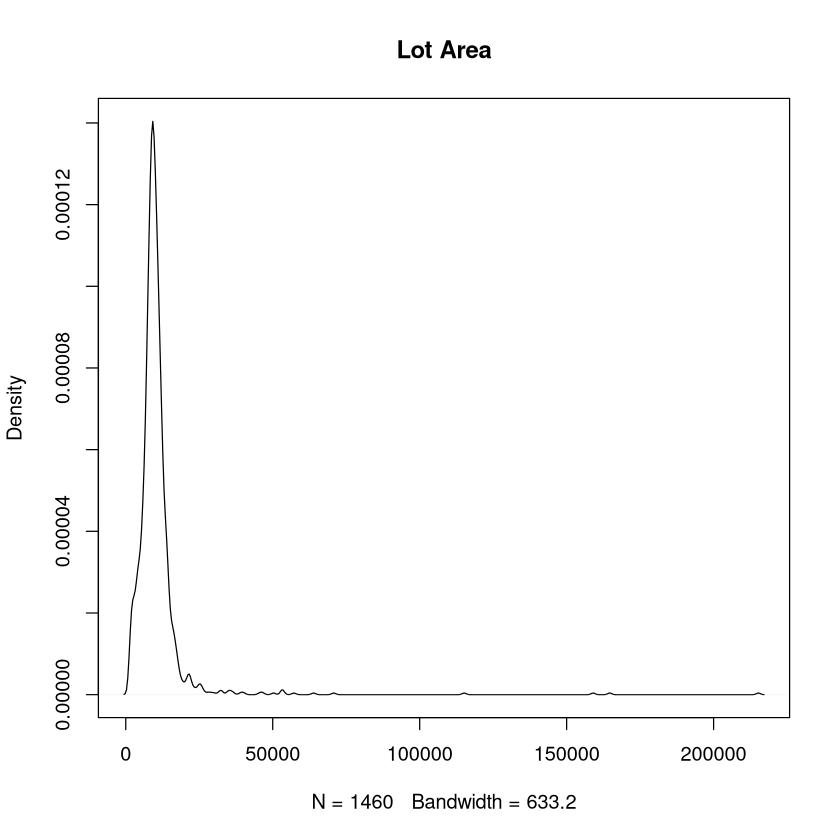

In [241]:
d <- density(house_prices$LotArea)
plot(d, main="Lot Area")

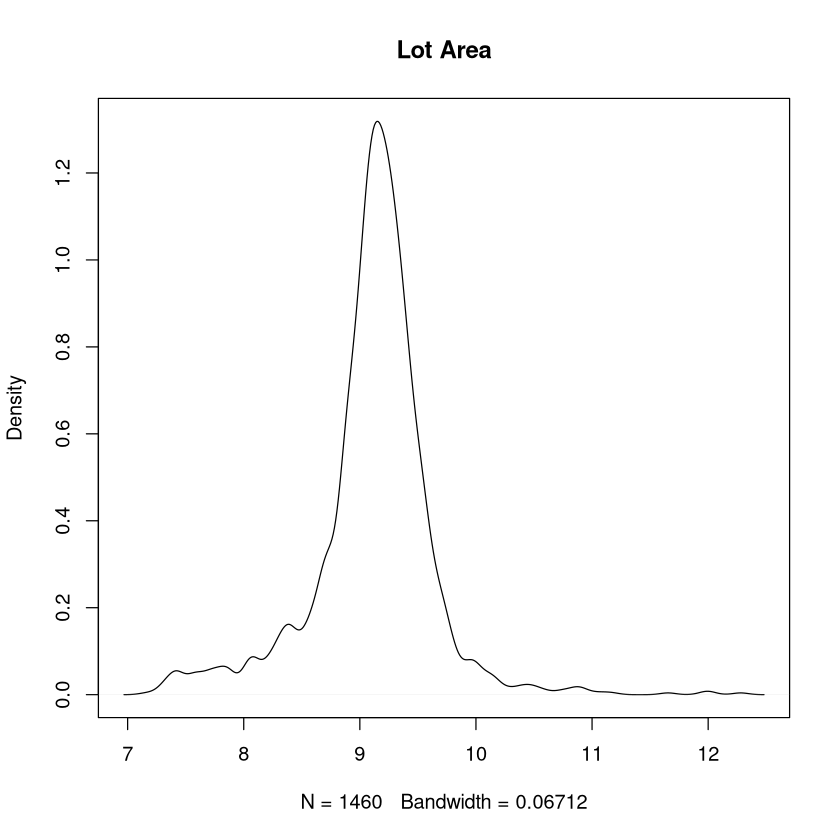

In [242]:
d <- density(log(house_prices$LotArea))
plot(d, main="Lot Area")

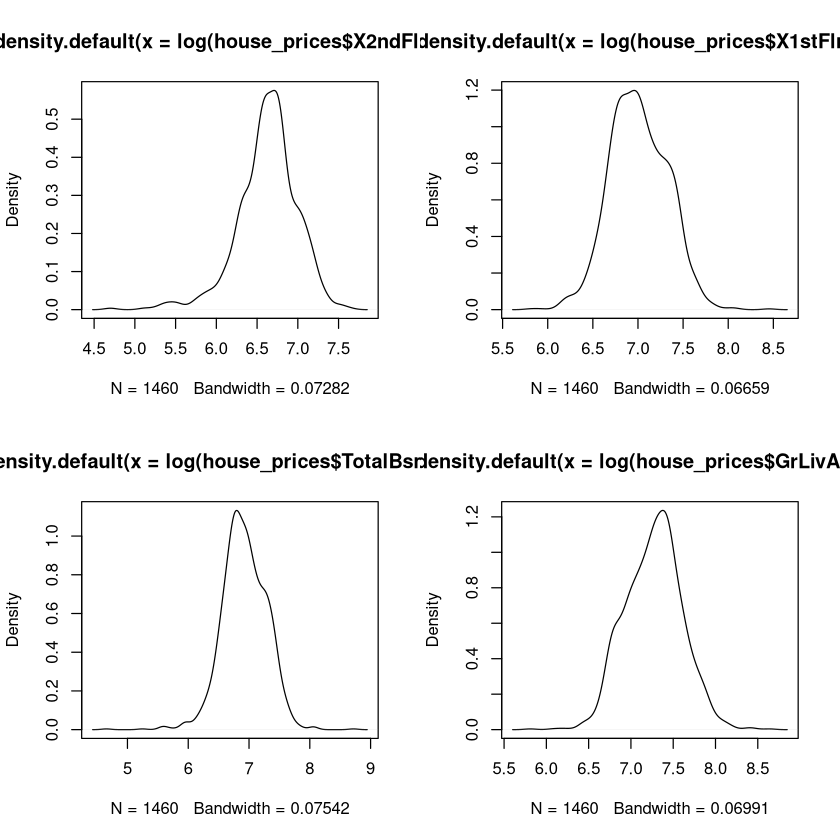

In [243]:
par(mfrow=c(2,2))
plot(density(log(house_prices$X2ndFlrSF)))
plot(density(log(house_prices$X1stFlrSF)))
plot(density(log(house_prices$TotalBsmtSF)))
plot(density(log(house_prices$GrLivArea)))

In [244]:
house_prices$X2ndFlrSF <- log(house_prices$X2ndFlrSF)
house_prices$X1stFlrSF <- log(house_prices$X1stFlrSF)
house_prices$TotalBsmtSF <- log(house_prices$TotalBsmtSF)
house_prices$GrLivArea <- log(house_prices$GrLivArea)

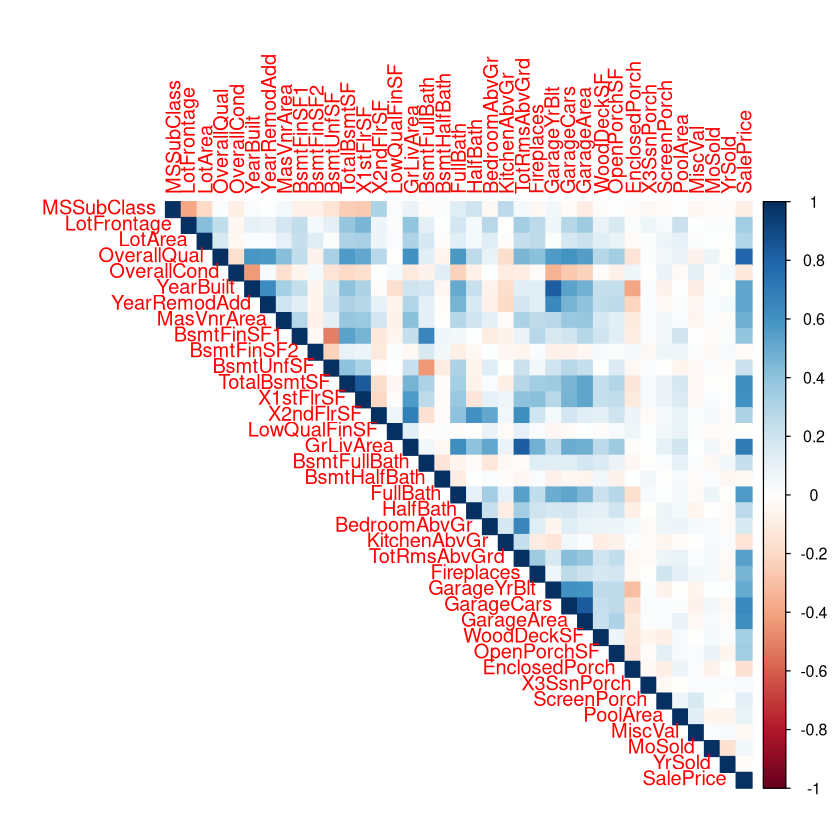

In [245]:

house_prices_nums_nona <- house_prices_nums %>% drop_na()
# print(house_prices_nums_nona[,c(3,9)])
corr= cor(house_prices_nums_nona)
#corr= cor(house_prices_nums[,c(-3,-9,-26)])
# corr= cor(house_prices_nums)
corrplot(corr, method="color", type='upper')

In [246]:
house_prices_ncol = ncol(house_prices_nums)
obj_field = which(colnames(house_prices_nums)=="SalePrice")
house_prices_ncol

[1] 37

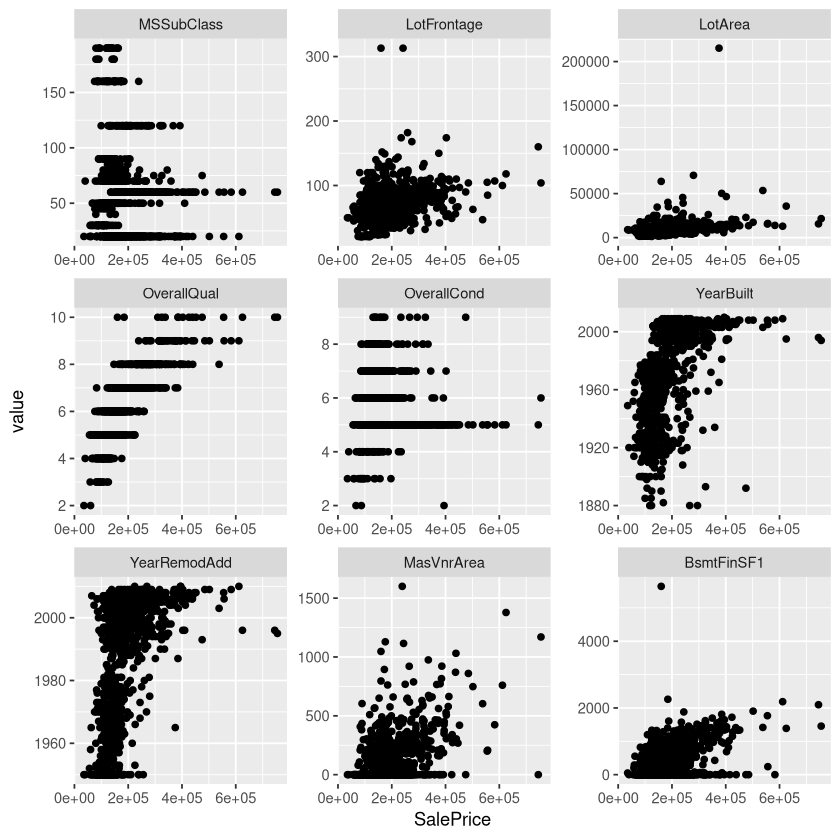

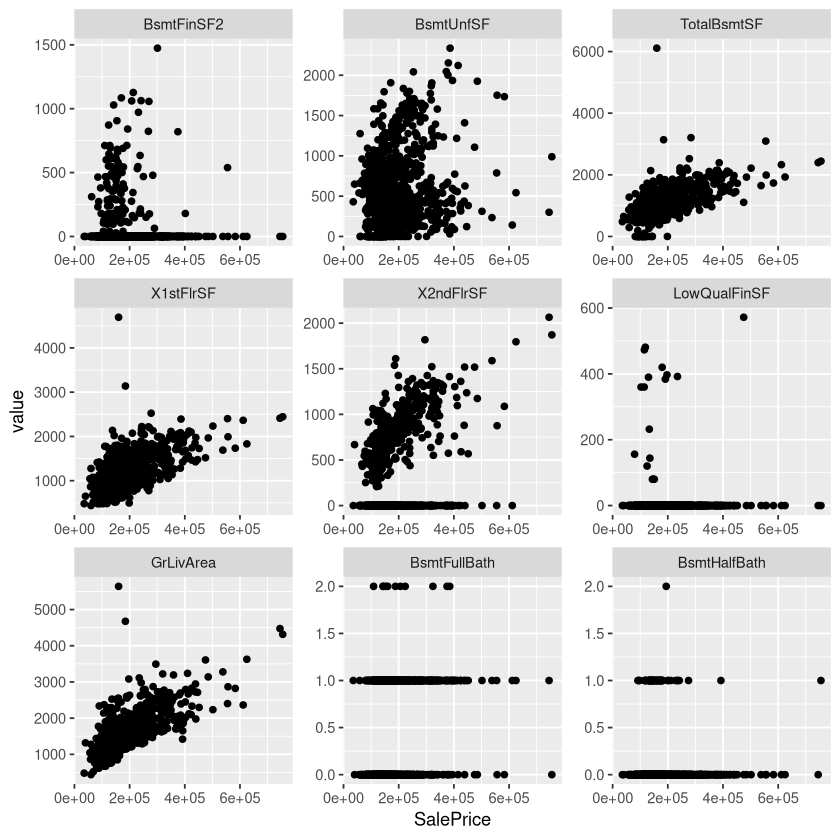

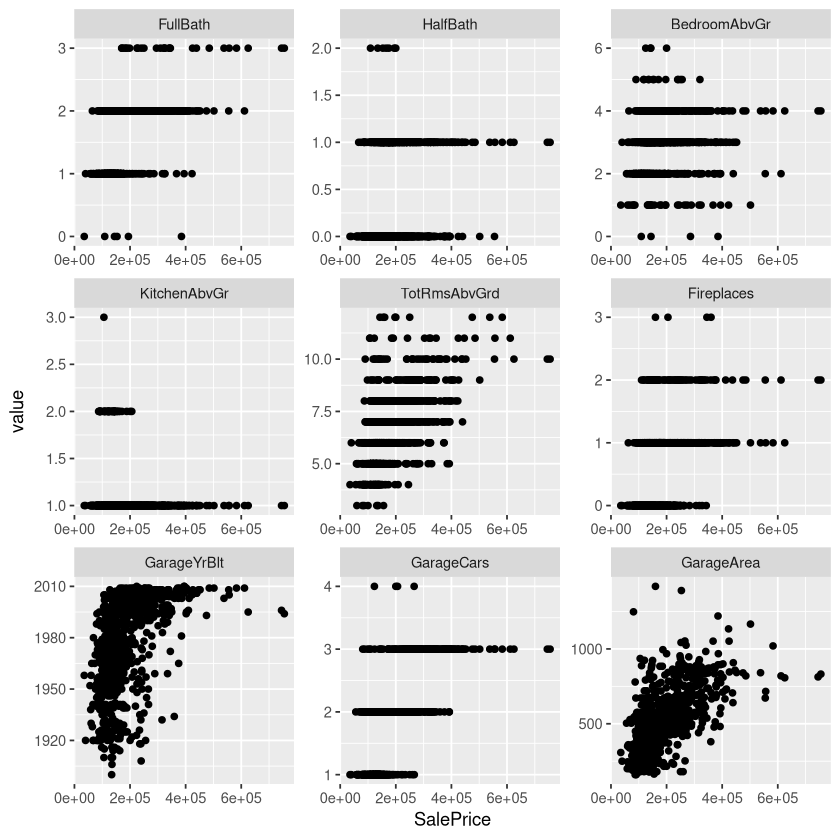

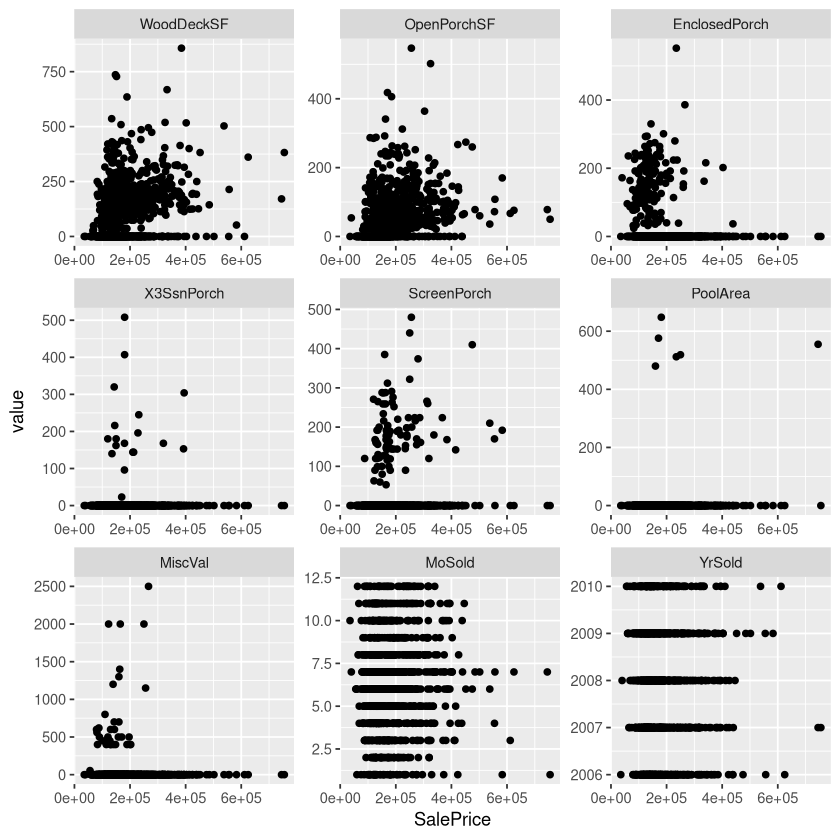

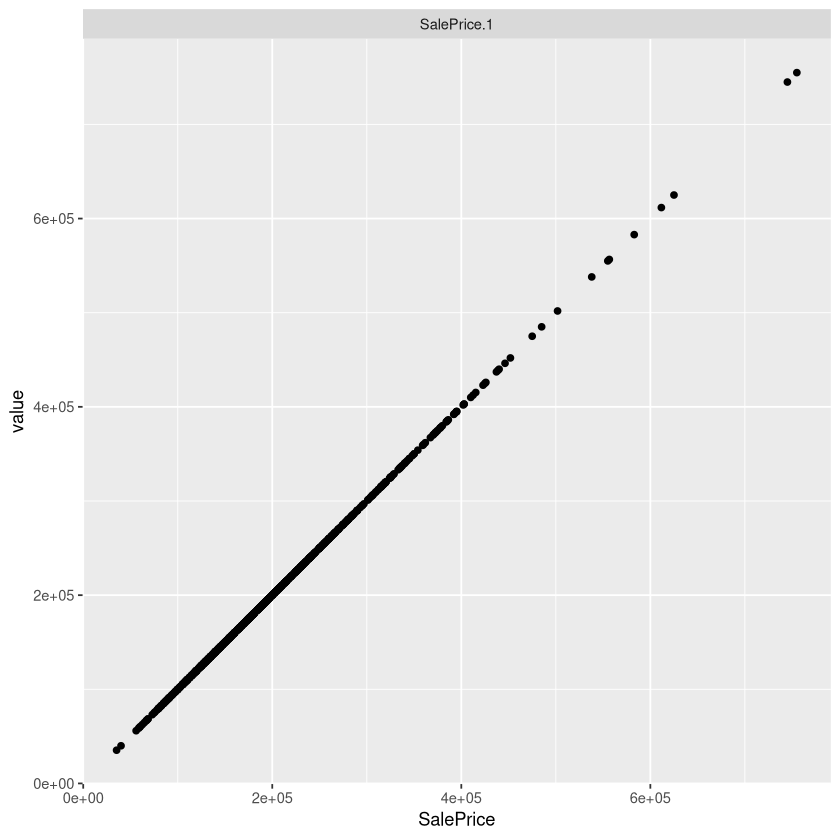

In [247]:
max <- ceiling((house_prices_ncol-1)/9)
for(i in 0:max) {
    first = i*9+1
    last = min(house_prices_ncol,first+8)
#    print(first)
#    print(last)
    house_prices_nums2 <- melt(house_prices_nums_nona[,c(first:last,obj_field)], id.vars = "SalePrice")
    print(ggplot(house_prices_nums2, aes(x=SalePrice, y=value)) + geom_point() + facet_wrap("variable", scales="free"))
}

In [248]:
indices <- which(house_prices_nums_nona$LotArea>200000)
house_prices_nums_nona=house_prices_nums_nona[-indices,]

indices <- which(house_prices_nums_nona$LotFrontage>250)
house_prices_nums_nona=house_prices_nums_nona[-indices,]

In [249]:
pvalues = rcorr(as.matrix(house_prices_nums_nona), type = "pearson")$P
pvalues_price <- pvalues[,'SalePrice']
sort(pvalues_price)

LotFrontage       LotArea   OverallQual     YearBuilt  YearRemodAdd 
 0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00 
   MasVnrArea    BsmtFinSF1   TotalBsmtSF     X1stFlrSF     X2ndFlrSF 
 0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00 
    GrLivArea      FullBath      HalfBath  TotRmsAbvGrd    Fireplaces 
 0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00 
  GarageYrBlt    GarageCars    GarageArea    WoodDeckSF   OpenPorchSF 
 0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00 
 BsmtFullBath     BsmtUnfSF  BedroomAbvGr EnclosedPorch  KitchenAbvGr 
 2.664535e-15  2.360334e-13  2.272510e-08  2.118151e-07  2.455696e-06 
  OverallCond   ScreenPorch      PoolArea    MSSubClass        MoSold 
 2.883676e-05  1.900459e-04  5.733275e-04  4.009426e-03  9.136447e-02 
   BsmtFinSF2  BsmtHalfBath       MiscVal    X3SsnPorch        YrSold 
 1.986799e-01  2.285159e-01  2.316884e-01  2.984335e-01  6.447979e-01 
 LowQualFinSF 
 9.673917e-01

In [250]:
sale_corr <- abs(corr[,'SalePrice'])
sort(sale_corr, decreasing = TRUE)

SalePrice   OverallQual     GrLivArea    GarageCars    GarageArea 
  1.000000000   0.797880680   0.705153567   0.647033611   0.619329622 
  TotalBsmtSF     X1stFlrSF      FullBath  TotRmsAbvGrd     YearBuilt 
  0.615612237   0.607969106   0.566627442   0.547067360   0.525393598 
 YearRemodAdd   GarageYrBlt    MasVnrArea    Fireplaces    BsmtFinSF1 
  0.521253270   0.504753018   0.488658155   0.461872689   0.390300523 
  LotFrontage   OpenPorchSF    WoodDeckSF     X2ndFlrSF       LotArea 
  0.344269772   0.343353812   0.336855121   0.306879002   0.299962206 
     HalfBath  BsmtFullBath     BsmtUnfSF  BedroomAbvGr EnclosedPorch 
  0.268560303   0.236737407   0.213128680   0.166813894   0.154843204 
 KitchenAbvGr   OverallCond   ScreenPorch      PoolArea    MSSubClass 
  0.140497445   0.124391232   0.110426815   0.092488120   0.088031702 
       MoSold  BsmtHalfBath       MiscVal    X3SsnPorch    BsmtFinSF2 
  0.051568064   0.036512665   0.036041237   0.030776594   0.028021366 
       YrSold  LowQualFinSF 
  0.011868823   0.001481983

In [251]:
library(FactoMineR)
library(factoextra)

In [252]:
prices_pca <- PCA(house_prices_nums)

Warning message in PCA(house_prices_nums):
“Missing values are imputed by the mean of the variable: you should use the imputePCA function of the missMDA package”

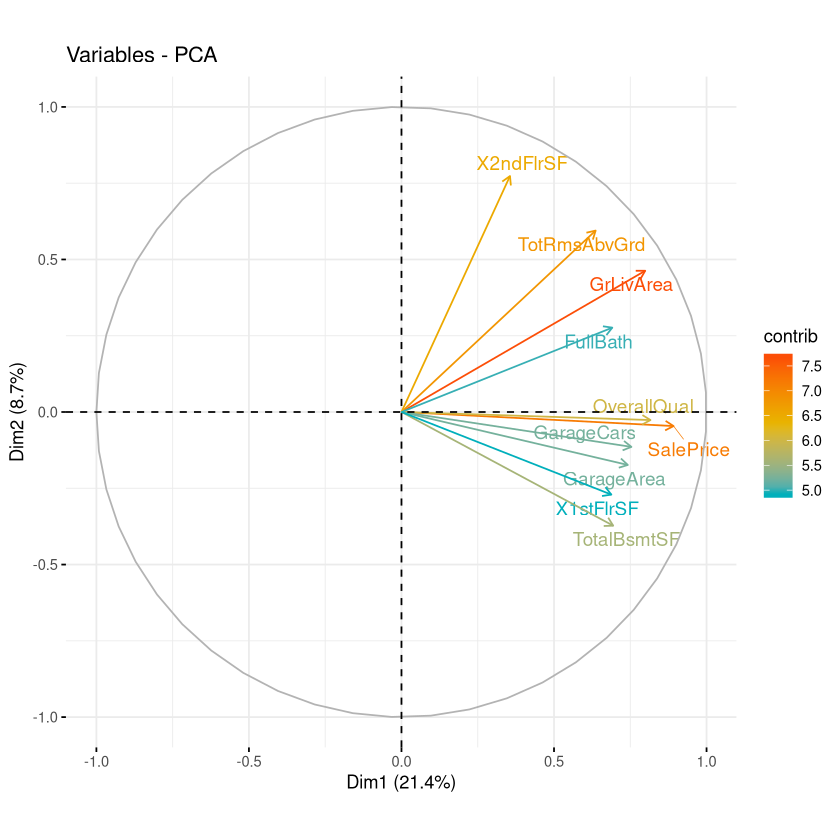

In [253]:
fviz_pca_var(prices_pca, col.var="contrib",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             select.var = list(contrib = 10),
             repel = TRUE # Avoid text overlapping
             )

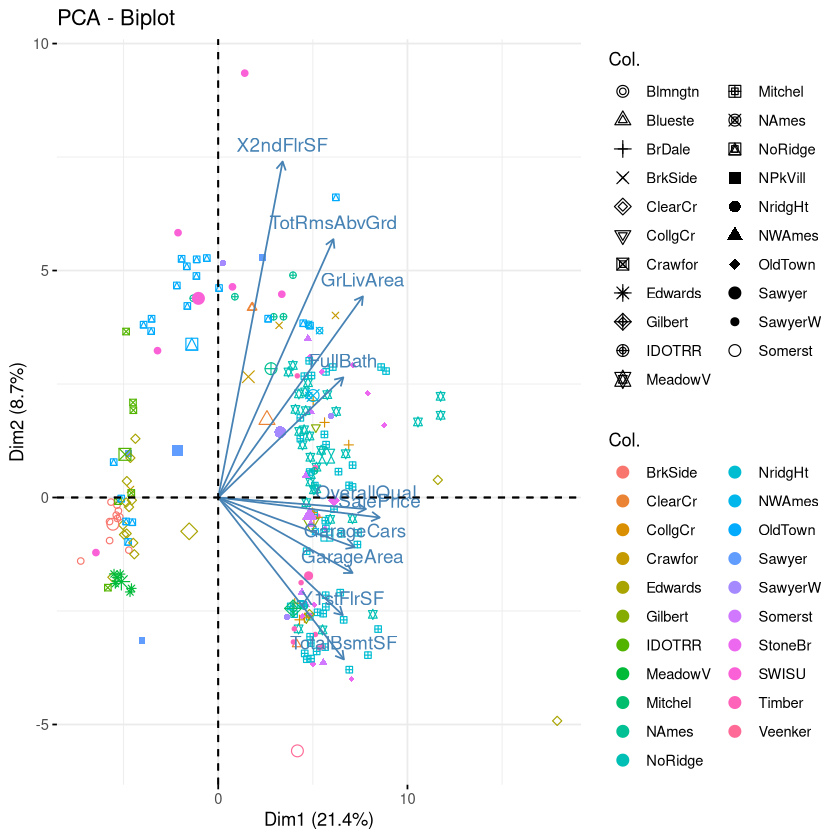

In [254]:
fviz_pca_biplot(prices_pca,select.var=list(contrib=10),
                select.ind=list(contrib=200),
                label="var",
                col.ind=house_prices$Neighborhood)

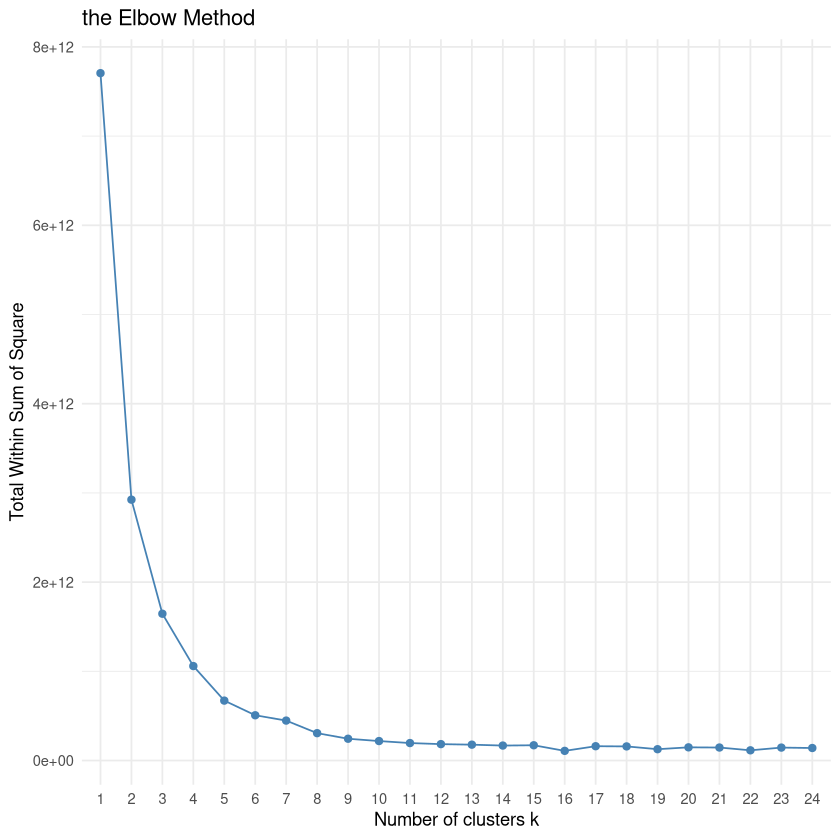

In [255]:
set.seed(31)
fviz_nbclust(house_prices_nums_nona, kmeans, method = "wss", k.max = 24) + theme_minimal() + ggtitle("the Elbow Method")

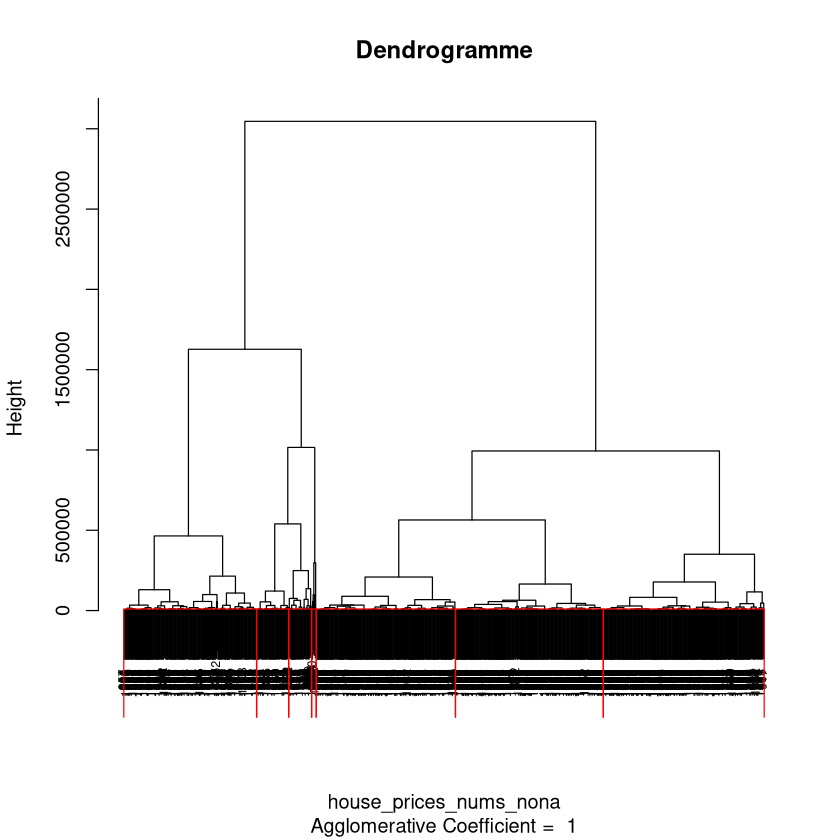

In [256]:
cah.res <- agnes(house_prices_nums_nona, method = "ward")
plot(cah.res, which.plot=2, cex=0.6, main ="Dendrogramme")
rect.hclust(cah.res, k=7)
grp <- cutree(cah.res, k = 7)

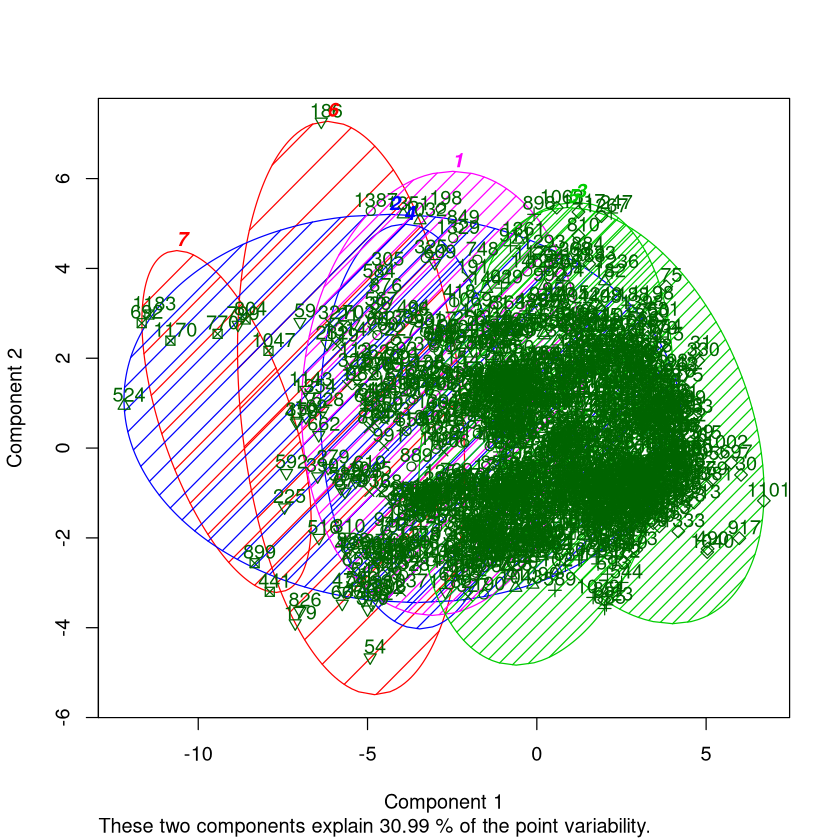

In [257]:
clusplot(house_prices_nums_nona, grp, color=TRUE, shade=TRUE,
         labels=2, lines=0, main= '')

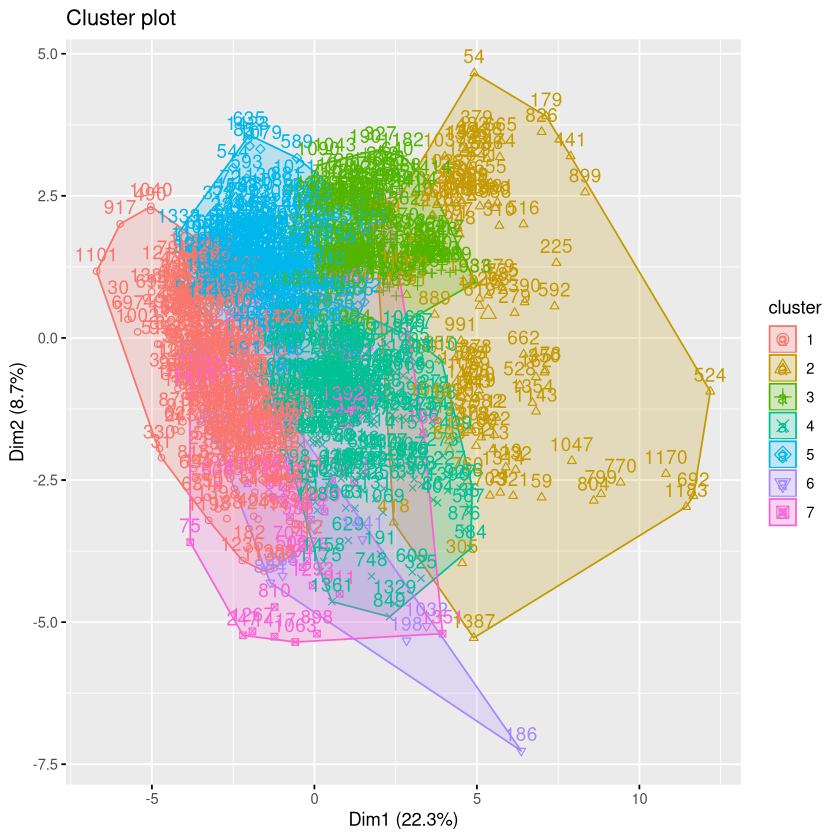

In [258]:
house.scaled = as.data.frame(scale(house_prices_nums_nona))
kmeans.res = kmeans(house.scaled, centers=7, nstart=10)
fviz_cluster(kmeans.res, data=house_prices_nums_nona)

In [259]:
houses.pca <- PCA(house_prices_nums_nona)

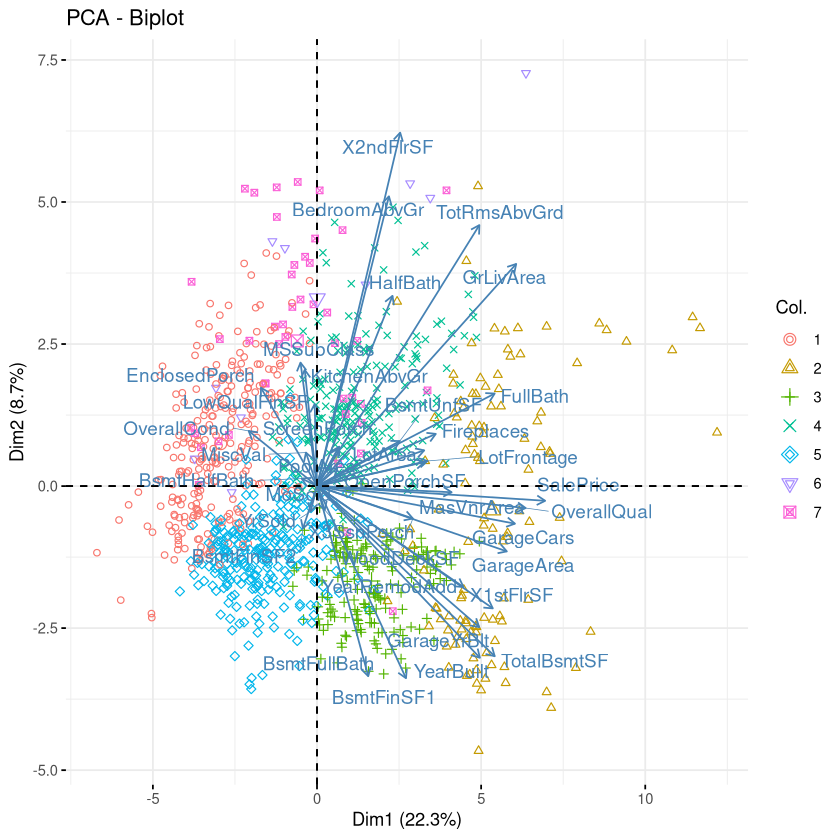

In [260]:
fviz_pca_biplot(houses.pca,
                label="var",
                col.ind=factor(kmeans.res$cluster),
                gradient.cols = c("darkblue", "red", "purple" ),
                repel=TRUE)

In [261]:
#boxplot(house_prices~)

In [262]:
house.scaled = subset(house.scaled, select = -c(MSSubClass) )


Call:
lm(formula = SalePrice ~ ., data = house.scaled)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.0952 -0.1831 -0.0057  0.1631  2.7578 

Coefficients: (2 not defined because of singularities)
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    5.690e-16  1.184e-02   0.000  1.00000    
LotFrontage    3.007e-02  1.502e-02   2.001  0.04562 *  
LotArea        7.320e-02  1.475e-02   4.962 8.08e-07 ***
OverallQual    2.562e-01  2.203e-02  11.629  < 2e-16 ***
OverallCond    7.803e-02  1.572e-02   4.964 8.03e-07 ***
YearBuilt      1.158e-01  2.925e-02   3.960 7.99e-05 ***
YearRemodAdd   4.324e-02  1.961e-02   2.205  0.02763 *  
MasVnrArea     6.079e-02  1.420e-02   4.280 2.04e-05 ***
BsmtFinSF1     2.483e-01  2.926e-02   8.483  < 2e-16 ***
BsmtFinSF2     4.584e-02  1.492e-02   3.072  0.00218 ** 
BsmtUnfSF      1.274e-01  2.627e-02   4.849 1.42e-06 ***
TotalBsmtSF           NA         NA      NA       NA    
X1stFlrSF      2.206e-01  2.957e-02   7.460 1.77e-13 

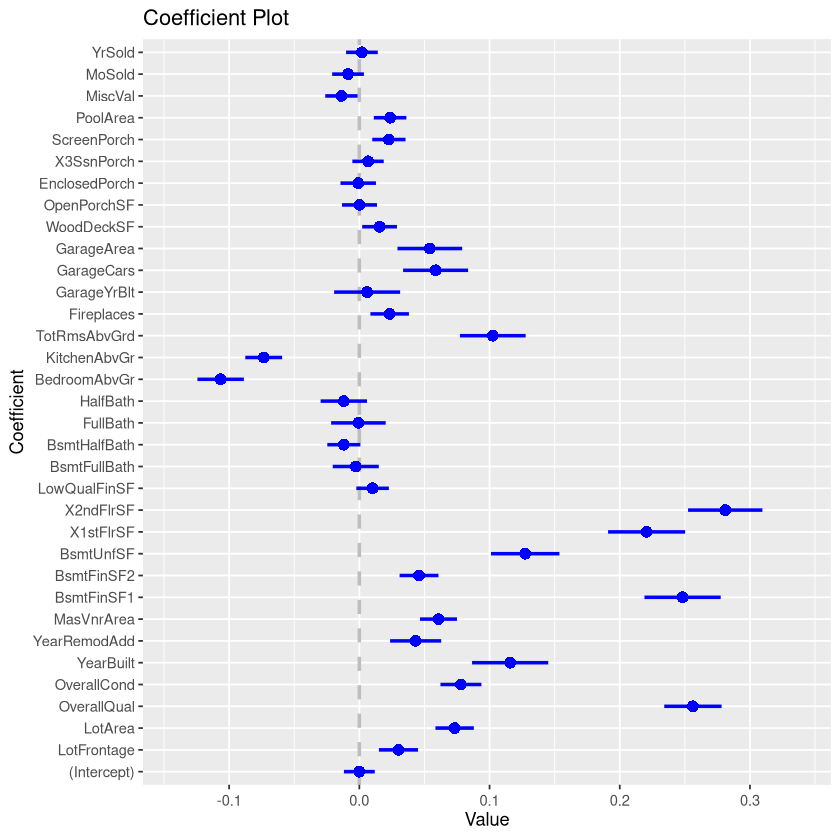

In [263]:
house.lm = lm(SalePrice~. , data=house.scaled)
summary(house.lm)
coefplot(house.lm)

Note: model has aliased coefficients
      sums of squares computed by model comparison


,Sum Sq,Df,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
LotFrontage,6.281612e-01,1,4.004832e+00,4.561896e-02
LotArea,3.862357e+00,1,2.462439e+01,8.084274e-07
OverallQual,2.121188e+01,1,1.352360e+02,1.530999e-29
OverallCond,3.864276e+00,1,2.463663e+01,8.034245e-07
YearBuilt,2.459552e+00,1,1.568083e+01,7.987173e-05
YearRemodAdd,7.629369e-01,1,4.864092e+00,2.763052e-02
MasVnrArea,2.872959e+00,1,1.831650e+01,2.036224e-05
BsmtFinSF1,NA,0,NA,NA
BsmtFinSF2,NA,0,NA,NA


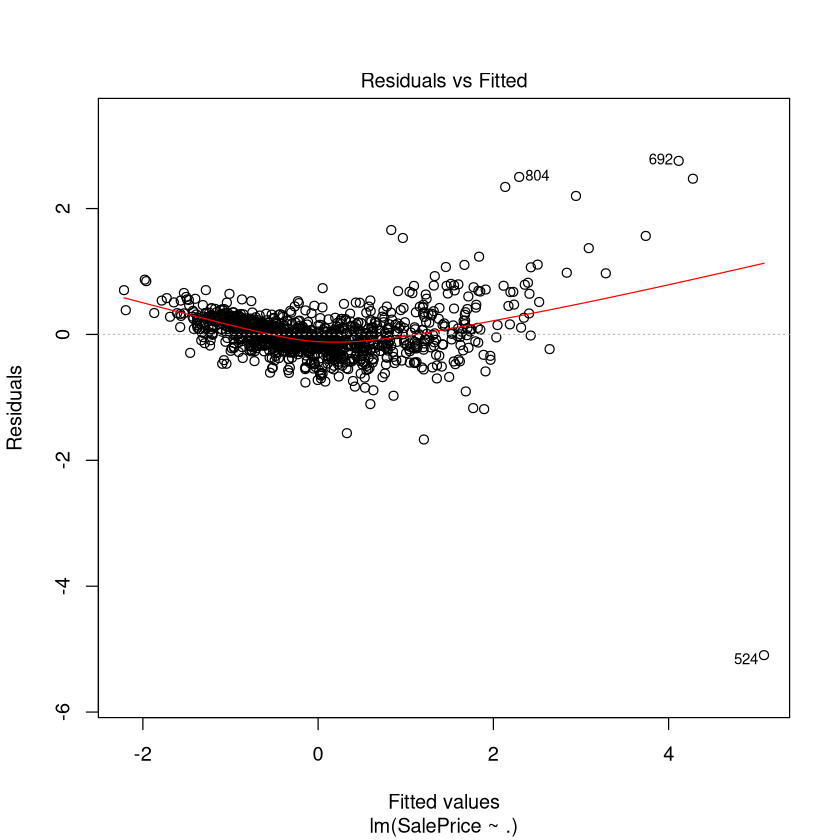

In [264]:
#vif(house.lm)
Anova(house.lm)
plot(house.lm,1)

Separate houses with and without 2nd floor

In [265]:
indices = which(house_prices_nums_nona$X2ndFlrSF == 0)
house.scaled.2ndFlr = house.scaled[-indices,]
house.scaled.no2ndFlr = house.scaled[indices,]

Second floor


Call:
lm(formula = SalePrice ~ X2ndFlrSF + X1stFlrSF + TotalBsmtSF + 
    GrLivArea, data = house.scaled.2ndFlr)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.3895 -0.2318  0.0237  0.2709  2.7350 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.30013    0.06874  -4.366 1.55e-05 ***
X2ndFlrSF    0.67918    0.25215   2.694  0.00731 ** 
X1stFlrSF    0.15835    0.21947   0.722  0.47094    
TotalBsmtSF  0.56624    0.05873   9.641  < 2e-16 ***
GrLivArea    0.03418    0.28230   0.121  0.90369    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6041 on 487 degrees of freedom
Multiple R-squared:  0.6927,	Adjusted R-squared:  0.6902 
F-statistic: 274.5 on 4 and 487 DF,  p-value: < 2.2e-16


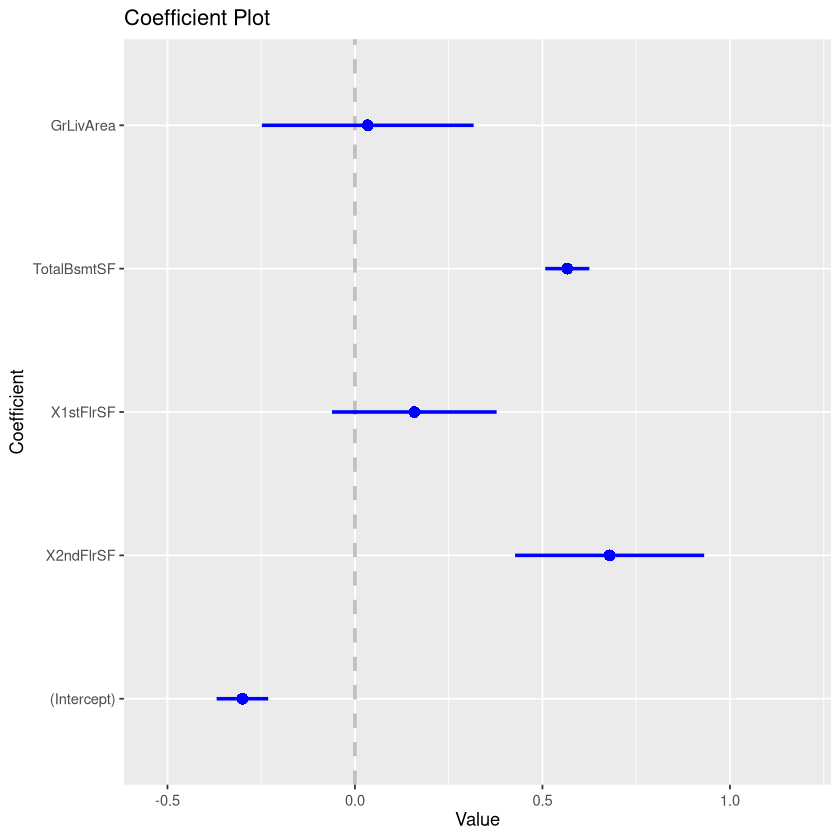

In [266]:
coefplot(lm(SalePrice~X2ndFlrSF+X1stFlrSF+TotalBsmtSF+GrLivArea , data=house.scaled.2ndFlr))
summary(lm(SalePrice~X2ndFlrSF+X1stFlrSF+TotalBsmtSF+GrLivArea , data=house.scaled.2ndFlr))

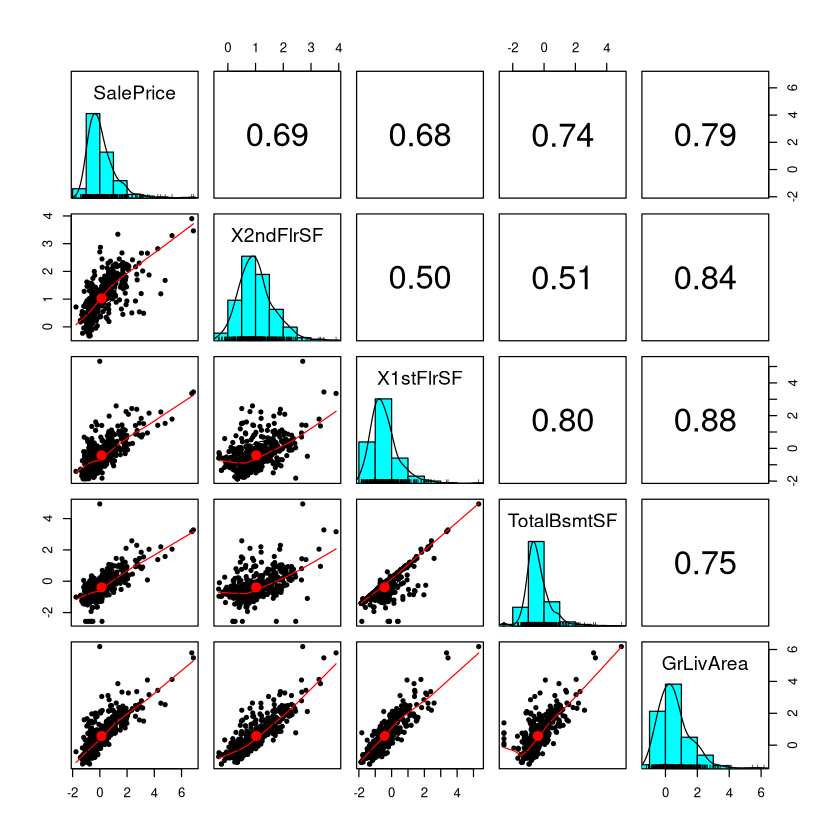

In [267]:
pairs.panels(house.scaled.2ndFlr[ ,c('SalePrice', 'X2ndFlrSF','X1stFlrSF','TotalBsmtSF','GrLivArea')])

No second floot


Call:
lm(formula = SalePrice ~ X1stFlrSF + TotalBsmtSF + GrLivArea, 
    data = house.scaled.no2ndFlr)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.28016 -0.24079  0.00411  0.24044  2.99558 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.42716    0.21862  -1.954   0.0512 .  
X1stFlrSF    0.51769    0.22833   2.267   0.0237 *  
TotalBsmtSF  0.35369    0.03352  10.551   <2e-16 ***
GrLivArea   -0.09699    0.31321  -0.310   0.7569    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5149 on 622 degrees of freedom
Multiple R-squared:  0.6855,	Adjusted R-squared:  0.684 
F-statistic: 451.9 on 3 and 622 DF,  p-value: < 2.2e-16


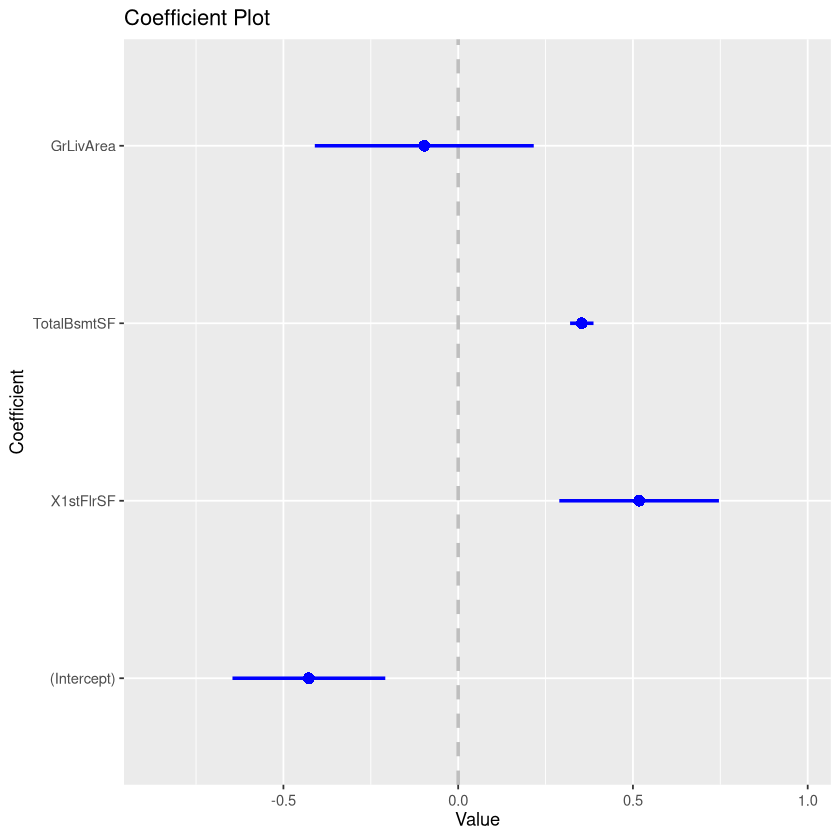

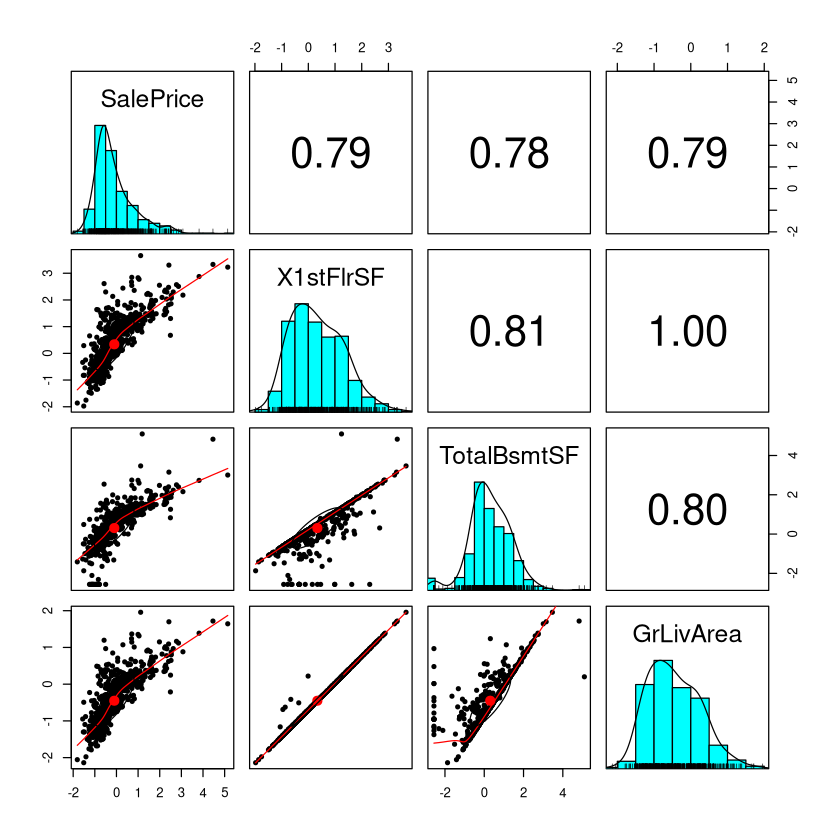

In [268]:
coefplot(lm(SalePrice~X1stFlrSF+TotalBsmtSF+GrLivArea , data=house.scaled.no2ndFlr))
summary(lm(SalePrice~X1stFlrSF+TotalBsmtSF+GrLivArea , data=house.scaled.no2ndFlr))
pairs.panels(house.scaled.no2ndFlr[ ,c('SalePrice', 'X1stFlrSF','TotalBsmtSF','GrLivArea')])

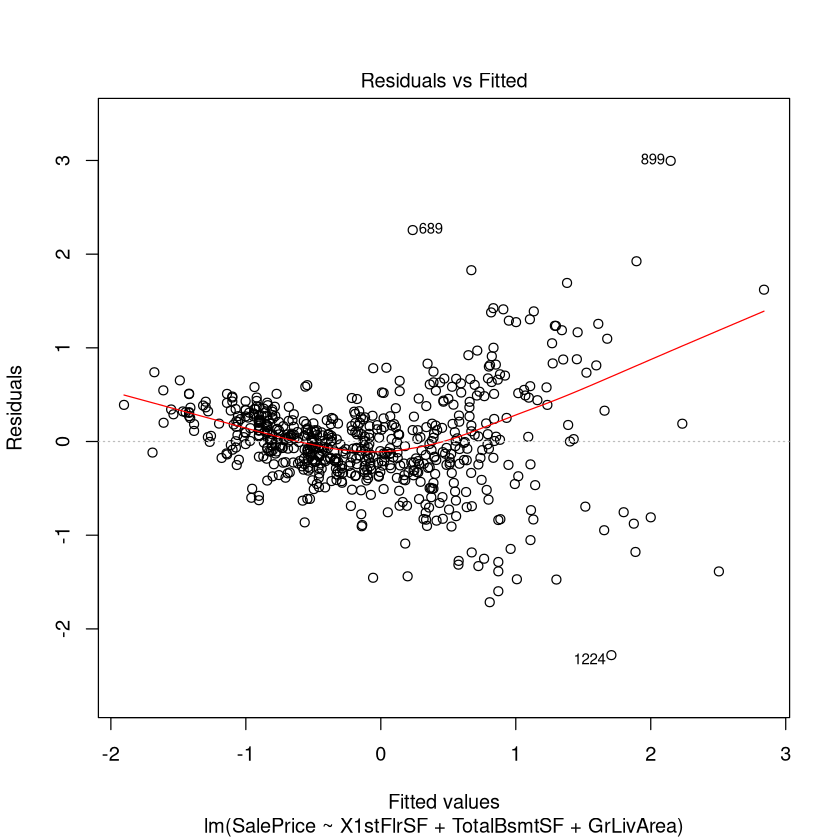

In [269]:
plot(lm(SalePrice~X1stFlrSF+TotalBsmtSF+GrLivArea , data=house.scaled.no2ndFlr),1)